**TASK 4: Image Classification**

Important Libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report

Load Ciphar Data

In [44]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [33]:
print(x_train.shape)

(50000, 32, 32, 3)


In [34]:
print(y_train.shape)

(50000, 1)


In [35]:
print(x_test.shape)

(10000, 32, 32, 3)


In [36]:
print(y_test.shape)

(10000, 1)


In [37]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [38]:
y_train= y_train.reshape(-1)

In [39]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [40]:
x_train=[0]

In [41]:
classes=['airplane', 'automobile', 'bird', 'cat', 'dog', 'dear', 'ship', 'truck']

In [45]:
classes=[3]

Plot sample data from the dataset

In [48]:
def plot_sample(X, Y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(x_train [index])
  plt.xlabel(classes [Y [index]])

TypeError: only integer scalar arrays can be converted to a scalar index

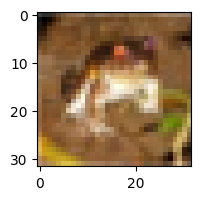

In [49]:
plot_sample(x_train, y_train, 0)

TypeError: only integer scalar arrays can be converted to a scalar index

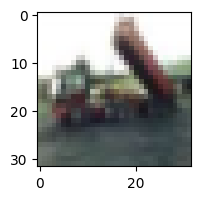

In [51]:
plot_sample(x_train, y_train, 2)

In [52]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [53]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

**Model Selection and Evaluation**

In [56]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [57]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4507 - accuracy: 0.4798
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1137 - accuracy: 0.6109
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9898 - accuracy: 0.6570
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9039 - accuracy: 0.6855
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8353 - accuracy: 0.7095
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7819 - accuracy: 0.7286
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7355 - accuracy: 0.7440
Epoch 8/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6896 - accuracy: 0.7590
Epoch 9/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6509 - accuracy: 0.7726
Epoch 10/10
1563/1563 [==============================] - 57s 36m

Result shows that the CNN model achieved a test accuracy of 69.67%, which is quite good.

In [59]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9421 - accuracy: 0.6967


[0.9420886039733887, 0.6966999769210815]

In [60]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [61]:
y_train= y_train.reshape(-1)

In [62]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

IndexError: list index out of range

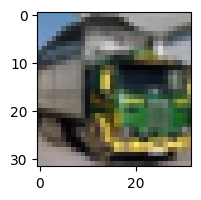

In [63]:
plot_sample(x_train, y_train, 14)

In [64]:
y_pred= cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[3.05839051e-02, 5.22019016e-03, 8.91314819e-03, 8.58322084e-01,
        8.11653503e-04, 1.10863680e-02, 2.06177905e-02, 1.20630875e-05,
        6.31341487e-02, 1.29866845e-03],
       [5.82358316e-02, 6.19878471e-02, 7.03451633e-06, 3.20259460e-07,
        6.17111127e-08, 1.33285898e-08, 4.36061711e-08, 7.10819681e-10,
        8.79649758e-01, 1.19079828e-04],
       [1.76925570e-01, 8.25805590e-02, 1.64891127e-03, 5.15034748e-03,
        7.35903392e-03, 3.37928795e-04, 5.34607607e-05, 2.43069394e-03,
        6.99367583e-01, 2.41458919e-02],
       [9.79617059e-01, 3.17159720e-05, 1.17697120e-02, 1.74329998e-05,
        1.07322307e-03, 2.21076604e-07, 2.02900337e-05, 5.86154101e-06,
        7.45991059e-03, 4.49749223e-06],
       [2.58133823e-05, 1.98072448e-04, 1.75141811e-01, 1.73487082e-01,
        2.58501291e-01, 7.74919381e-03, 3.84149820e-01, 1.03445773e-05,
        7.30918546e-04, 5.59831642e-06]], dtype=float32)

In [65]:
np.argmax(y_pred[0])

3

In [66]:
y_class=[np.argmax(element) for element in y_pred]

In [67]:
y_class[:5]

[3, 8, 8, 0, 6]

In [68]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)